## DATASET VISUALIZATION AND PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer 

In [2]:
%matplotlib inline

In [3]:
Stopwords = list(stopwords.words('english'))

#### READING OUR DATASET

In [4]:
### LOADING DATA ####
data = pd.read_csv('datasets/reddit_data.csv')

<b> Run the cell to view Data </b>

In [5]:
### OUR DATASET ####
data.head(3)

,Flair,Post
0,Politics,Pitting a community against a political party ...
1,Politics,A new political party gave a full front page a...
2,Politics,AAP’s woeful response to the Delhi communal vi...


<b>THE FOLLOWING CELL SHOWS :</b>
<br>
Flair Name : No. of Samples

In [6]:
post_count = Counter(data['Flair'])
for i in post_count.items():
    print(i[0],': ',i[1])

Politics :  150
Coronavirus :  150
AskIndia :  150
Non-Political :  150
Policy/Economy :  148
Scheduled :  136
Business/Finance :  143
Science/Technology :  144
Food :  125
Photography :  131


#### PIE PLOT OF OUR DATASET
<br>
This shows that for each class we have nearly same number of samples.
<br>
This would prevent the problem of getting biased results towards a single class

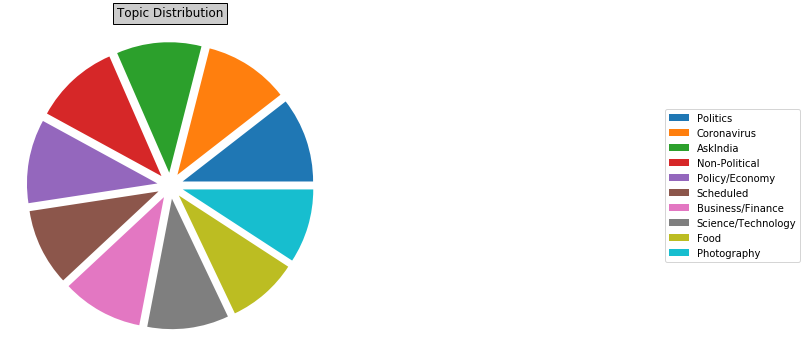

In [7]:
#### FOR PLOTTING OUR DATASET ###
topic_count = Counter(data['Flair'])
numbers = [i for w,i in topic_count.items()]
explode = [0.1 for i in range(len(numbers))]
topics = [w for w,i in topic_count.items()]


fig,axs = plt.subplots(figsize=(12,6))
wedges, texts = axs.pie(x = numbers,explode=explode)
axs.legend(wedges, topics,loc="center left",bbox_to_anchor=(2, 0, 0.5, 1))
axs.set_title('Topic Distribution',bbox={'facecolor':'0.8'})
plt.show()

###### A BAR PLOT OF OUR DATASET

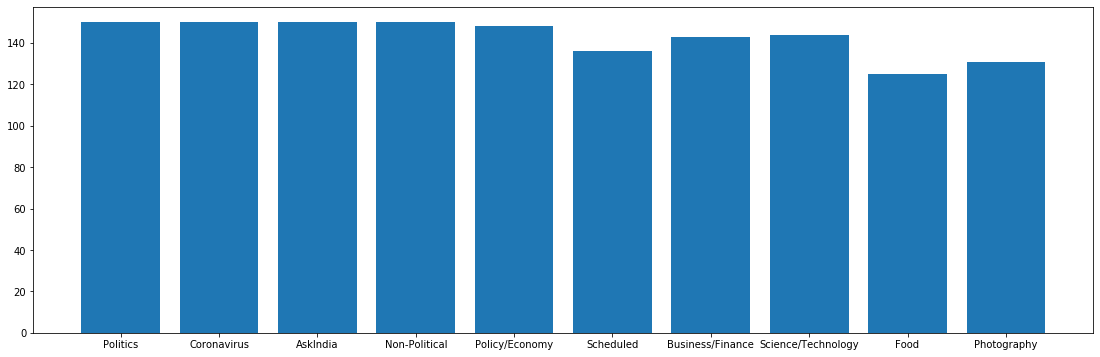

In [19]:
fig, axs = plt.subplots(figsize=(19,6))
axs.bar(topics,numbers)
plt.show()

###### RUN THE BELOW CELLS FOR PREPROCESSING DATA

<b>preprocess()</b> : preprocesses the data, converting each word to a lowercase and removing stopwords<br>
<b>preprocess_only_stem()</b> : preprocesses the data using the process of 'stemming'<br>
<b>preprocess_only_lemmatized()</b> : preprocesses the data using the process of 'lemmatization'
<br>
<br>
<b>INTUITION : </b>
<ul>
<li>Making a word to its lowercase is helpful in treating words like 'AAP' and 'aap' to be same instead of treating the different.</li>
<li>we must removing high frequency words like: ['is','an','the'] from our data because they are unhelpful in classifying our post title</li>
</ul>
<br>
Lemmatization : The process of reducing a word to it's root form using a predifined vocabulary.<br>
Stemming : The process of reducing a word to it's root form using some rules.

In [21]:
### PREPROCESSING DATA #####
def preprocess_only_stem(x):
    stemmer = PorterStemmer()
    x = x.lower()
    x = re.sub("[^a-z0-9'@+-/]",' ',x)
    tokens = x.split()
    new_tok = [i for i in tokens if i not in Stopwords]
    return ' '.join([stemmer.stem(i) for i in new_tok])

def preprocess_only_lemmatized(x):
    lemmatizer = WordNetLemmatizer()
    x = x.lower()
    x = re.sub("[^a-z0-9'@+-/]",' ',x)
    tokens = x.split()
    new_tok = [i for i in tokens if i not in Stopwords]
    return ' '.join([lemmatizer.lemmatize(i) for i in new_tok])

def preprocess(x):
    x = x.lower()
    x = re.sub("[^a-z0-9'@+-/]",' ',x)
    tokens = x.split()
    new_tok = [i for i in tokens if i not in Stopwords]
    return ' '.join(new_tok)

<b> lets try an example </b>

In [45]:
a = 'Doctor Who Treated Slum Dwellers Dies From Coronavirus In Indore'
print('after lemmatizing',' : ',preprocess_only_lemmatized(a))
print('after stemming',' : ',preprocess_only_stem(a))
print('after simple preprocessing',' : ',preprocess(a))

after lemmatizing  :  doctor treated slum dweller dy coronavirus indore
after stemming  :  doctor treat slum dweller die coronaviru indor
after simple preprocessing  :  doctor treated slum dwellers dies coronavirus indore


#### DATA AFTER SIMPLE PREPROCESSING

In [28]:
### PROCESSED DATASET AFTER SIMPLE PREPROCESSING ####
print(data['Post'].apply(preprocess))

0       pitting community political party fucking stupid.
1       new political party gave full front page ad po...
2       aap woeful response delhi communal violence re...
3       soft hindutva, left revolution, kejriwal estab...
4                        comic current political scenario
                              ...                        
1422    np sister loves cooking food photography - gif...
1423    beautiful double statue @ salar jung museum, h...
1424      taking pictures inside metro station prohibited
1425               pilot friend mailed pic ,thought share
1426    ask non-commercial/hobby drone photography all...
Name: Post, Length: 1427, dtype: object


#### DATASET AFTER STEMMING

In [29]:
### PROCESSED DATASET AFTER STEMMING ####
print(data['Post'].apply(preprocess_only_stem))

0                     pit commun polit parti fuck stupid.
1       new polit parti gave full front page ad popula...
2       aap woeful respons delhi commun violenc reflec...
3       soft hindutva, left revolution, kejriw establi...
4                            comic current polit scenario
                              ...                        
1422    np sister love cook food photographi - gift ra...
1423    beauti doubl statu @ salar jung museum, hydera...
1424             take pictur insid metro station prohibit
1425                 pilot friend mail pic ,thought share
1426    ask non-commercial/hobbi drone photographi all...
Name: Post, Length: 1427, dtype: object


#### DATASET AFTER LEMMATIZATION

In [40]:
### PROCESSED DATASET AFTER LEMMATIZATION ####
print(data['Post'].apply(preprocess_only_lemmatized))

0       pitting community political party fucking stupid.
1       new political party gave full front page ad po...
2       aap woeful response delhi communal violence re...
3       soft hindutva, left revolution, kejriwal estab...
4                        comic current political scenario
                              ...                        
1422    np sister love cooking food photography - gift...
1423    beautiful double statue @ salar jung museum, h...
1424       taking picture inside metro station prohibited
1425               pilot friend mailed pic ,thought share
1426    ask non-commercial/hobby drone photography all...
Name: Post, Length: 1427, dtype: object


#### RUN THE CELLS BELOW TO SAVE DATASET TO 'datasets' FOLDER

<b> FOR SIMPLE PREPROCESSING: </b>

In [42]:
### FOR SIMPLE PREPROCESSING ####
# data['Post'] = data['Post'].apply(preprocess)
# data.to_csv('datasets/process_reddit_data_simple.csv',index=False)

<b> FOR PREPROCESSING WITH STEMMING: </b>

In [46]:
### FOR PREPROCESSING WITH STEMMING #####
# data['Post'] = data['Post'].apply(preprocess_only_stem)
# data.to_csv('datasets/process_reddit_data_stemmed.csv',index=False)

<b> FOR PREPROCESSING WITH LEMMATIZATION: </b>

In [47]:
#### FOR PREPROCESSING WITH LEMMATIZATION #####
# data['Post'] = data['Post'].apply(preprocess_only_lemmatized)
# data.to_csv('datasets/process_reddit_data_lemmed.csv',index=False)